In [2]:
# Import Library
import pandas as pd

In [4]:
## Load The Datasets
df = pd.read_csv(r"D:\Customer-Order-Behaviour\Data\walmart_customer_data.csv")

In [5]:
## Preview Top 5 Rows
df.head()

,customer_id,age,gender,city,category,product_name,purchase_date,purchase_amount,payment_method,discount_applied,rating,repeat_customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [7]:
# Shape of the data
df.shape

(50000, 12)

In [8]:
## Column Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [9]:
## Null Values
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [10]:
# Unique values in each column
df.nunique()

Customer_ID         50000
Age                    43
Gender                  3
City                25096
Category                4
Product_Name           16
Purchase_Date         366
Purchase_Amount     31378
Payment_Method          4
Discount_Applied        2
Rating                  5
Repeat_Customer         2
dtype: int64

In [11]:
# Basic stats
df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [12]:
## Check for duplicate rows
df.duplicated().sum()

0

In [13]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [14]:
# Check again for nulls
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [15]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [16]:
# Final shape check
df.shape

(50000, 12)

# EXPLORATORY DATA ANALYSIS (EDA)

In [18]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## PART A: Categorical Analysis

### Gender-wise Spending

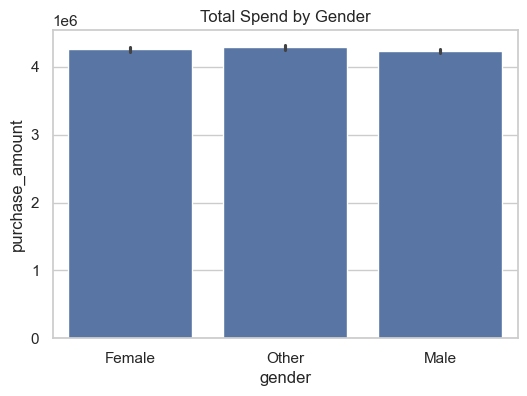

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='purchase_amount', data=df, estimator=sum)
plt.title("Total Spend by Gender")
plt.show()

### Age group Spending

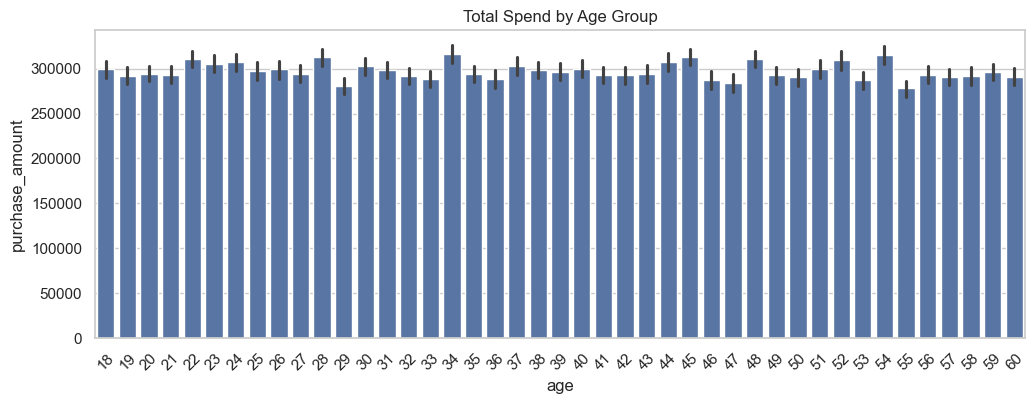

In [29]:
plt.figure(figsize=(12,4))
sns.barplot(x='age', y='purchase_amount', data=df, estimator=sum)
plt.title("Total Spend by Age Group")
plt.xticks(rotation=45)
plt.show()

### Category Preference

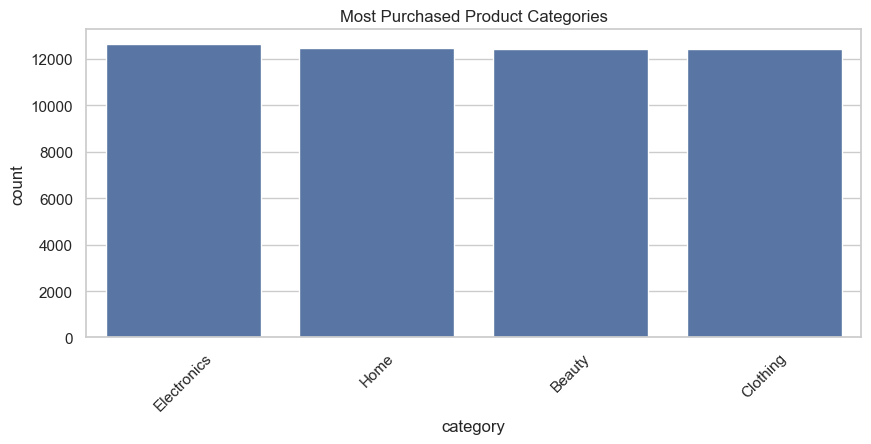

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Most Purchased Product Categories")
plt.xticks(rotation=45)
plt.show()

## PART B: Correlation + Continuous Variables

### Heatmap of numerical correlation

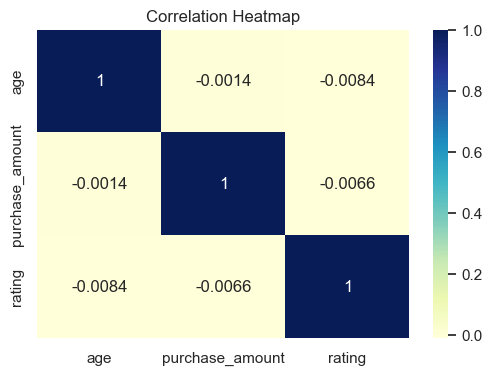

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Average amount spent by gender

In [55]:
df.groupby('gender')['purchase_amount'].mean()

gender
Female    256.382360
Male      254.230838
Other     255.982589
Name: purchase_amount, dtype: float64

### Average spend by Repeat vs New Customers 

In [42]:
df.groupby('repeat_customer')['purchase_amount'].mean()

repeat_customer
No     255.043853
Yes    256.011165
Name: purchase_amount, dtype: float64

### Which age group spends the most?

In [43]:
df.groupby('age')['purchase_amount'].sum().sort_values(ascending=False).head()

age
34    315860.39
54    314798.58
45    312956.09
28    312606.62
48    310614.87
Name: purchase_amount, dtype: float64

### Most profitable product categories

In [44]:
df.groupby('category')['purchase_amount'].sum().sort_values(ascending=False)

category
Electronics    3260688.09
Home           3195217.51
Beauty         3174727.90
Clothing       3145977.98
Name: purchase_amount, dtype: float64

### Effect of discounts on ratings

In [48]:
# Convert 'Yes'/'No' to 1/0
df['discount_applied'] = df['discount_applied'].map({'Yes': 1, 'No': 0})

In [49]:
df[['discount_applied', 'rating']].corr()

,discount_applied,rating
discount_applied,1.000000,-0.000875
rating,-0.000875,1.000000


### Correlation heatmap

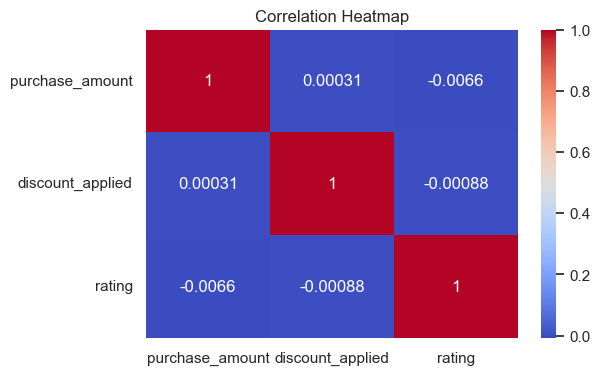

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['purchase_amount', 'discount_applied', 'rating']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 📊 Business Insights Summary

### 🔍 Key Questions Answered:
- Which customer segment spends the most?  
- Which product categories bring in the most revenue?  
- Are discounts really increasing sales or improving ratings?  
- Do repeat customers spend more than new ones?  
- Are there any patterns in rating vs amount spent?

---

### 🧠 Insights:

- Average spend is fairly consistent across genders, with female customers spending U256.38 on average — slightly more than others.
- Repeat customers spend marginally more (256.01) than new customers (255.04), suggesting limited loyalty-based uplift.
- Age 34, 54, and 45 are the most profitable customer groups, each contributing over 310,000 in total revenue.
- Electronics is the top-performing product category, generating over 3.26 million in revenue, followed closely by Home and Beauty.
- Discounts show no real correlation with customer ratings (correlation = -0.0008), indicating they don’t directly impact satisfaction.

---


## Visualization Summary 

### 📈 Chart 1: Average Spend by Gender

This bar chart compares the average purchase amount across gender groups. Female customers show slightly higher average spending.

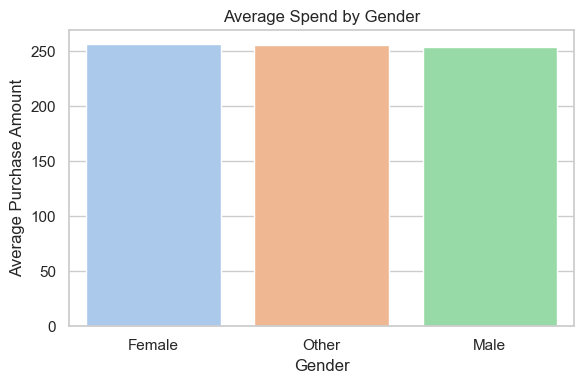

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='purchase_amount', data=df, estimator='mean', ci=None, palette='pastel')
plt.title("Average Spend by Gender")
plt.ylabel("Average Purchase Amount")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

### 📈 Chart 2: Total Revenue by Age Group

This chart shows the total revenue contributed by each age group. Customers aged 34, 54, and 45 are the most profitable segments.

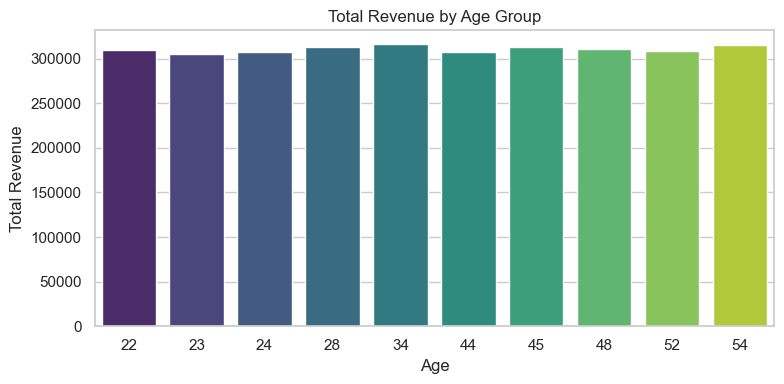

In [61]:
age_revenue = df.groupby('age')['purchase_amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=age_revenue.index, y=age_revenue.values, palette='viridis')
plt.title("Total Revenue by Age Group")
plt.xlabel("Age")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### 📈 Chart 3: Revenue by Product Category

This chart highlights the top-performing product categories. Electronics leads, followed by Home, Beauty, and Clothing.

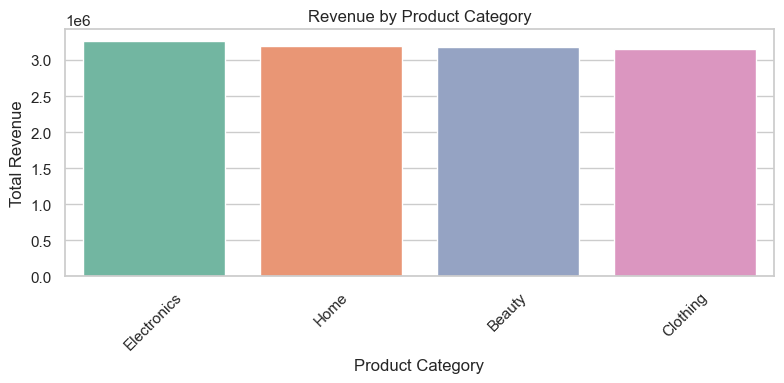

In [63]:
category_revenue = df.groupby('category')['purchase_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='Set2')
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📈 Chart 4: Spend Distribution by Customer Type

This box plot compares spending patterns of repeat vs new customers. Repeat customers show slightly higher median spend.

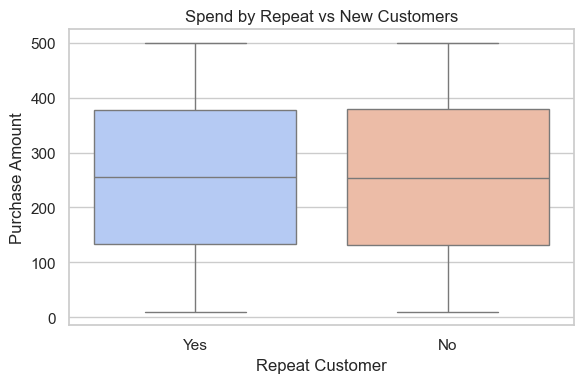

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x='repeat_customer', y='purchase_amount', data=df, palette='coolwarm')
plt.title("Spend by Repeat vs New Customers")
plt.xlabel("Repeat Customer")
plt.ylabel("Purchase Amount")
plt.tight_layout()
plt.show()

### 📈 Chart 5: Correlation Heatmap

This heatmap visualizes relationships between numerical variables like purchase amount, discounts, and ratings.

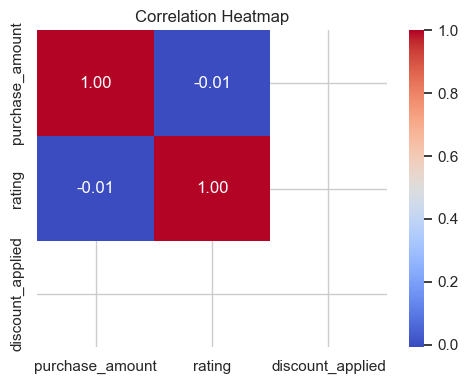

In [66]:
df['discount_applied'] = df['discount_applied'].map({'Yes': 1, 'No': 0})
corr_matrix = df[['purchase_amount', 'rating', 'discount_applied']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()